In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# Load Boston Housing dataset from keras datasets
from tensorflow.keras.datasets import boston_housing

# Load the data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (404, 13)
Testing Data Shape: (102, 13)


In [4]:
# Standardizing features (important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Building the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Single neuron output (because it's regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 545.9993 - mae: 21.8039 - val_loss: 607.7329 - val_mae: 22.9563
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 542.8785 - mae: 21.5167 - val_loss: 561.0021 - val_mae: 21.9551
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 516.6158 - mae: 20.7032 - val_loss: 504.4275 - val_mae: 20.6791
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 419.4878 - mae: 18.5368 - val_loss: 429.5303 - val_mae: 18.8542
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 354.8130 - mae: 16.9485 - val_loss: 333.7974 - val_mae: 16.3004
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 259.7852 - mae: 14.0111 - val_loss: 231.5655 - val_mae: 12.9502
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 153.5406 - mae: 10.3502 - val_loss: 145.7797 - val_mae: 9.3756
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 95.5400 - mae: 7.7786 - val_loss: 98.2894 - val_mae: 7.4272
Epoch 9/100
1

In [7]:
# Evaluate on Test Set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Test Loss (MSE): {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")


4/4 - 0s - 15ms/step - loss: 24.9964 - mae: 3.0486
Test Loss (MSE): 25.00
Test MAE: 3.05


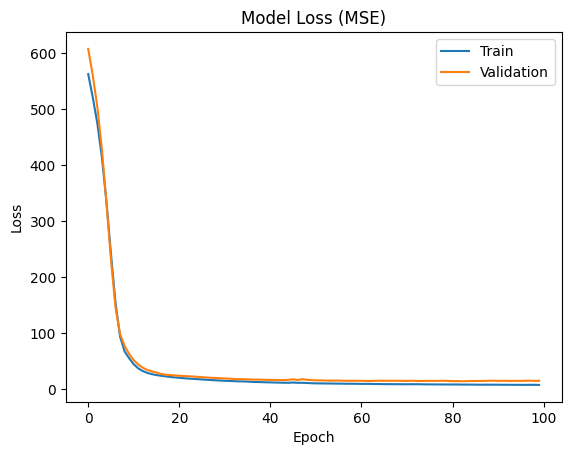

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [9]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Display first 5 predictions vs actual prices
for i in range(5):
    print(f"Predicted Price: {predictions[i][0]:.2f}, Actual Price: {y_test[i]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Price: 9.02, Actual Price: 7.2
Predicted Price: 18.05, Actual Price: 18.8
Predicted Price: 21.19, Actual Price: 19.0
Predicted Price: 30.35, Actual Price: 27.0
Predicted Price: 25.37, Actual Price: 22.2
